<a href="https://colab.research.google.com/github/0asmmma/Final_project_-programming-/blob/main/final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from statistics import mode

In [92]:
gym = pd.read_csv('/content/gym.csv')
gym

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [93]:
# Drop rows with any missing values
gym.dropna(inplace=True)
gym

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [94]:
gym = gym.drop([
    'Age',
    'Gender',
    'Weight (kg)',
    'Height (m)',
    'Max_BPM',
    'Avg_BPM',
    'Resting_BPM',
    'Workout_Type',
    'Fat_Percentage',
    'Water_Intake (liters)',
    'Experience_Level',
    'BMI'
], axis=1)


In [95]:
print('The number of rows: ',gym.shape[0]) #Number of rows
print('The number of columns: ',gym.shape[1]) #Number of columns
print('The column names are: ', gym.columns) #Get the names of the columns
gym

The number of rows:  973
The number of columns:  3
The column names are:  Index(['Session_Duration (hours)', 'Calories_Burned',
       'Workout_Frequency (days/week)'],
      dtype='object')


,Session_Duration (hours),Calories_Burned,Workout_Frequency (days/week)
0,1.69,1313.0,4
1,1.30,883.0,4
2,1.11,677.0,4
3,0.59,532.0,3
4,0.64,556.0,3
...,...,...,...
968,1.57,1364.0,4
969,1.38,1260.0,2
970,1.72,929.0,5
971,1.10,883.0,3


In [96]:
#The full describtion of all columns
gym.describe()

,Session_Duration (hours),Calories_Burned,Workout_Frequency (days/week)
count,973.000000,973.000000,973.000000
mean,1.256423,905.422405,3.321686
std,0.343033,272.641516,0.913047
min,0.500000,303.000000,2.000000
25%,1.040000,720.000000,3.000000
50%,1.260000,893.000000,3.000000
75%,1.460000,1076.000000,4.000000
max,2.000000,1783.000000,5.000000


In [97]:
# Random sampling of size 150
random_sample_150 = gym.sample(n=150, random_state=1)

# Descriptive statistics for selected columns
print(random_sample_150[['Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days/week)']].describe())

# Extract each column individually
session_duration_data = random_sample_150['Session_Duration (hours)'].dropna()
calories_burned_data = random_sample_150['Calories_Burned'].dropna()
workout_frequency_data = random_sample_150['Workout_Frequency (days/week)'].dropna()

       Session_Duration (hours)  Calories_Burned  \
count                150.000000       150.000000   
mean                   1.208533       865.333333   
std                    0.327882       250.259990   
min                    0.510000       330.000000   
25%                    1.022500       707.750000   
50%                    1.195000       861.000000   
75%                    1.400000      1032.500000   
max                    1.970000      1688.000000   

       Workout_Frequency (days/week)  
count                     150.000000  
mean                        3.286667  
std                         0.884897  
min                         2.000000  
25%                         3.000000  
50%                         3.000000  
75%                         4.000000  
max                         5.000000  


In [98]:
# Define the descriptive statistics function
def Desc_stat(ds, var):

    mean = ds[var].mean()
    median = ds[var].median()
    mode = ds[var].mode()
    minimum = ds[var].min()
    maximum = ds[var].max()
    range_ = maximum - minimum
    std_dev = ds[var].std()
    variance = ds[var].var()
    skew = ds[var].skew()
    kurtosis = ds[var].kurt()
    count = ds[var].count()
    Quart = [
        ds[var].quantile(0),
        ds[var].quantile(0.25),
        ds[var].quantile(0.50),
        ds[var].quantile(0.75),
        ds[var].quantile(1),
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]

    summary = {
        'Average ': float(mean),
        'Median ': float(median),
        'Mode ': mode.tolist(),
        'Minimum ': float(minimum),
        'Maximum ': float(maximum),
        'Range ': float(range_),
        'Std Dev ': float(std_dev),
        'Variance ': float(variance),
        'Skewness ': float(skew),
        'Kurtosis ': float(kurtosis),
        '25th Pecentile ': float(Quart[1]),
        '50th Pecentile ': float(Quart[2]),
        '75th Pecentile ': float(Quart[3]),
        'Maximum ': float(Quart[4]),
        'Inter Quartile Range ': float(Quart[5]),
        'Count ': int(count)
    }

    return summary


Desc_stat(gym, 'Session_Duration (hours)')


{'Average ': 1.2564234326824255,
 'Median ': 1.26,
 'Mode ': [1.03, 1.13, 1.37],
 'Minimum ': 0.5,
 'Maximum ': 2.0,
 'Range ': 1.5,
 'Std Dev ': 0.3430334803899634,
 'Variance ': 0.1176719686684514,
 'Skewness ': 0.0257610266883642,
 'Kurtosis ': -0.35080518817693873,
 '25th Pecentile ': 1.04,
 '50th Pecentile ': 1.26,
 '75th Pecentile ': 1.46,
 'Inter Quartile Range ': 0.41999999999999993,
 'Count ': 973}

In [99]:
random_sample = gym.sample(n=150, random_state=1)
descriptive_stats(random_sample, 'Calories_Burned')

Descriptive statistics for Calories_Burned:
count     150.000000
mean      865.333333
std       250.259990
min       330.000000
25%       707.750000
50%       861.000000
75%      1032.500000
max      1688.000000
Name: Calories_Burned, dtype: float64


In [100]:
# Task 8: Systematic sample (every 5th row, condition: frequency ≥ 3)
systematic_sample = gym[gym['Workout_Frequency (days/week)'] >= 3].iloc[::5]
descriptive_stats(systematic_sample, 'Calories_Burned')

Descriptive statistics for Calories_Burned:
count     156.000000
mean      953.673077
std       258.759950
min       303.000000
25%       767.750000
50%       925.500000
75%      1111.500000
max      1783.000000
Name: Calories_Burned, dtype: float64


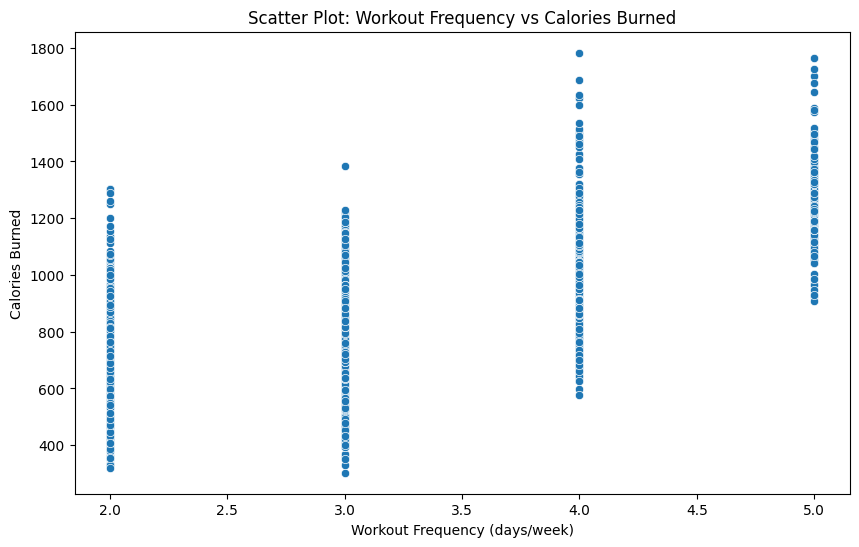

In [101]:
# Scatter Plot: Workout Frequency vs Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=gym)
plt.title('Scatter Plot: Workout Frequency vs Calories Burned')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Calories Burned')
plt.show()



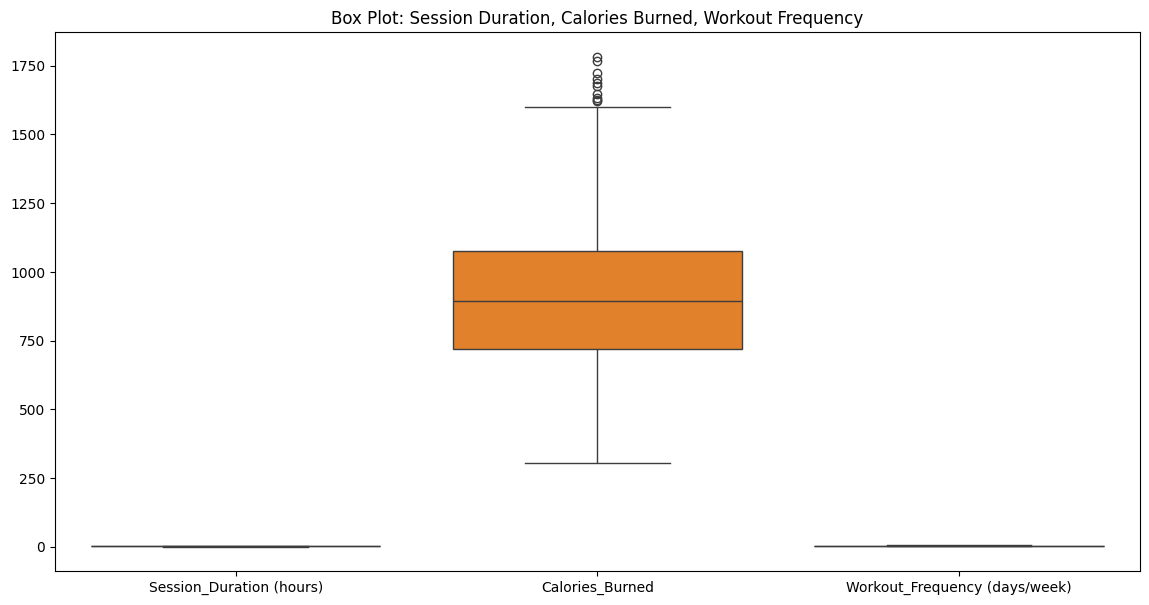

In [102]:
# Box Plot: Session Duration, Calories Burned, Workout Frequency
plt.figure(figsize=(14, 7))
sns.boxplot(data=gym[['Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days/week)']])
plt.title('Box Plot: Session Duration, Calories Burned, Workout Frequency')
plt.show()




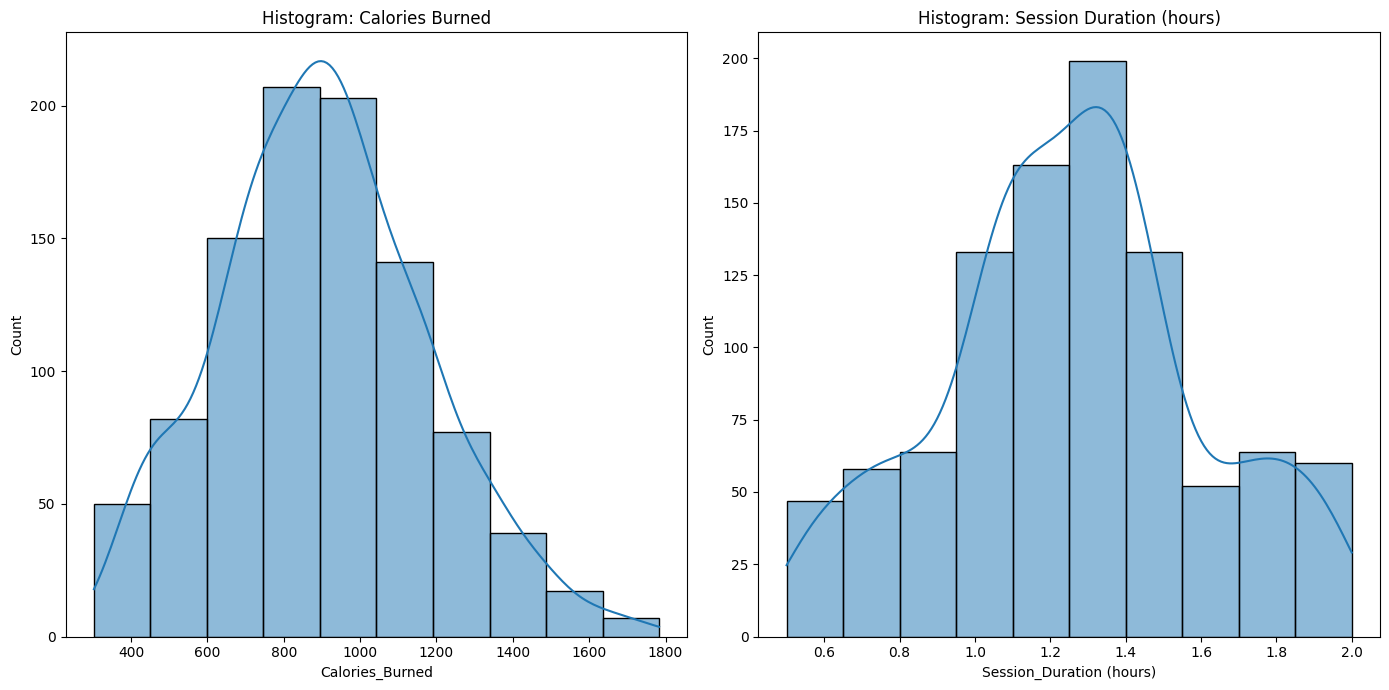

In [103]:
# Histogram: Calories Burned and Session Duration
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(gym['Calories_Burned'], bins=10, kde=True)
plt.title('Histogram: Calories Burned')

plt.subplot(1, 2, 2)
sns.histplot(gym['Session_Duration (hours)'], bins=10, kde=True)
plt.title('Histogram: Session Duration (hours)')

plt.tight_layout()
plt.show()


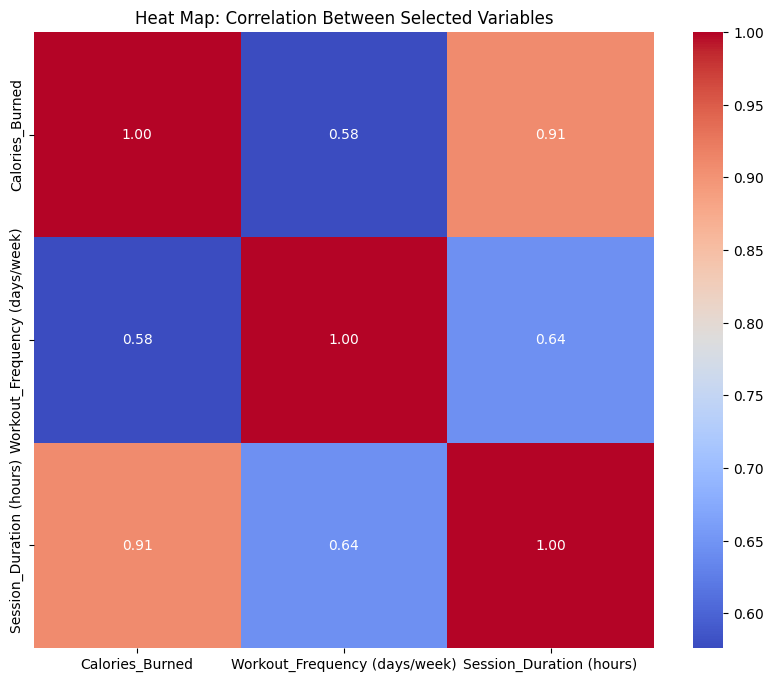

In [104]:
# Heat Map: Correlation Between Selected Variables
plt.figure(figsize=(10, 8))
selected = gym[['Calories_Burned', 'Workout_Frequency (days/week)', 'Session_Duration (hours)']]
correlation_matrix = selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map: Correlation Between Selected Variables')
plt.show()


In [105]:
from scipy.stats import pearsonr, spearmanr

# Extract variables
x = gym['Workout_Frequency (days/week)'].dropna()
y = gym['Calories_Burned'].dropna()

# Ensure both are aligned
aligned_data = pd.concat([x, y], axis=1).dropna()
x = aligned_data['Workout_Frequency (days/week)']
y = aligned_data['Calories_Burned']

# Pearson Correlation
pearson_corr, pearson_p = pearsonr(x, y)
print("Pearson Correlation:")
print(f"Correlation Coefficient = {pearson_corr:.3f}")
print(f"P-value = {pearson_p:.5f}")
print("Significant" if pearson_p < 0.05 else "Not significant")

# Spearman Correlation
spearman_corr, spearman_p = spearmanr(x, y)
print("\nSpearman Correlation:")
print(f"Correlation Coefficient = {spearman_corr:.3f}")
print(f"P-value = {spearman_p:.5f}")
print("Significant" if spearman_p < 0.05 else "Not significant")


Pearson Correlation:
Correlation Coefficient = 0.576
P-value = 0.00000
Significant

Spearman Correlation:
Correlation Coefficient = 0.543
P-value = 0.00000
Significant


In [106]:
# one-sample t-test
stat, pvalue = ttest_1samp(gym['Calories_Burned'], 905.42)
# Display results
print(f"t-test statistic: {stat}")
print(f"p-value: {pvalue}")

# Interpret the result
alpha = 0.05
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")

t-test statistic: 0.0002751486894669229
p-value: 0.9997805195695004
Do not reject the null hypothesis


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

In [108]:
# Convert calories_burned into classes (for classification)
gym['calories_class'] = pd.cut(gym['Calories_Burned'], bins=[0, 500, 1000, 1500, 1783], labels=[0, 1, 2, 3])

In [109]:
# Features and Targets
X = gym[['Session_Duration (hours)', 'Workout_Frequency (days/week)']]
y_regression = gym['Calories_Burned']  # For regression
y_classification = gym['calories_class']  # For classification

In [110]:
# Simple Regression using session_duration only
X_simple = gym[['Session_Duration (hours)']]
y = gym['Calories_Burned']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.3, random_state=0)

In [112]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [113]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("Simple Regression Score:", regressor.score(X_test, y_test))


Simple Regression Score: 0.8461324491264924


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.3, random_state=0)

In [115]:
# Multiple Linear Regression
regressor_multiple = LinearRegression()
regressor_multiple.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred_multiple = regressor_multiple.predict(X_test)
print("Multiple Regression Score:", regressor_multiple.score(X_test, y_test))

Multiple Regression Score: 0.8463402760500082


In [117]:
# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.3, random_state=0)

In [118]:
# Logistic Regression
logistic = LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)

In [119]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [120]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [121]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [122]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", acc)
    return acc

# Evaluate all models
acc_logistic = evaluate_model(y_test, y_pred_logistic, "Logistic Regression")


Model: Logistic Regression
Confusion Matrix:
 [[ 15  11   0   0]
 [  1 150  17   0]
 [  0  29  63   0]
 [  0   0   6   0]]
Accuracy: 0.7808219178082192


In [123]:
acc_knn = evaluate_model(y_test, y_pred_knn, "KNN")


Model: KNN
Confusion Matrix:
 [[ 20   6   0   0]
 [  2 144  22   0]
 [  0  28  61   3]
 [  0   0   5   1]]
Accuracy: 0.773972602739726


In [124]:
acc_nb = evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Model: Naive Bayes
Confusion Matrix:
 [[ 24   2   0   0]
 [  6 147  15   0]
 [  0  31  51  10]
 [  0   0   4   2]]
Accuracy: 0.7671232876712328


In [125]:
acc_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")


Model: Decision Tree
Confusion Matrix:
 [[ 21   5   0   0]
 [  6 145  17   0]
 [  0  32  58   2]
 [  0   1   4   1]]
Accuracy: 0.7705479452054794


In [126]:
# Logistic Model is Best With Highest Accuracy
final_model = LogisticRegression(max_iter=200)
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)
print("Final Predictions:", final_prediction)


Final Predictions: [2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 0 0 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 2 2 1 0 1 1 1 1 1 2 1 0 0 1 2 1 2 2 2 2 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 1 0 1 0 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1
 1 2 2 1 2 1 1 1 1 2 1 1 1 2 0 1 0 2 1 1 2 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 0 1 1 1 1 1 2 2 2 1 1 1 2 1 2 1 2 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 0 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 2 1 2 1 2 0 1 1 1 2 1 0
 2 1 1 1 0 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 0 1
 2 2 1 1 2 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 2 2 2 1]


In [127]:
# cluster based on session_duration only
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(gym[['Session_Duration (hours)']])

In [128]:
# Add cluster info to the dataset
gym['cluster'] = clusters

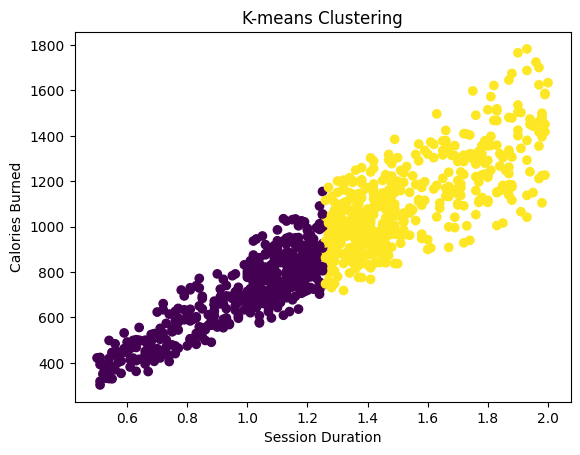

In [129]:
# Plot clusters
plt.scatter(gym['Session_Duration (hours)'], gym['Calories_Burned'], c=gym['cluster'])
plt.xlabel('Session Duration')
plt.ylabel('Calories Burned')
plt.title('K-means Clustering')
plt.show()

The cluster diagram shows a clear positive relationship between how long users spend in a session and how many calories they burn, meaning that those who stick around longer tend to burn more calories. This trend looks like the data splits into some meaningful groups, which could help us make better predictions. By figuring out these clusters, we can gain insight into different types of users, like casual ones who have shorter sessions compared to more hardcore users who work out longer.

To step things up, we could create separate predictive models for each group, leading to more accurate forecasts. Adding the cluster label as a new feature in our classification models might help us spot hidden patterns and enhance performance. We should also deal with outliers from clustering separately so they don't mess with our results. Overall using clustering as a preliminary step would help us provide more tailored recommendations and improve prediction quality.